# CHAPTER 4: _Systematic evaluation of ML algorithms in automated fashion_


---

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib as mpl
mpl.rcParams['figure.dpi']=125

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['xtick.labelsize']=13
mpl.rcParams['ytick.labelsize']=13
mpl.rcParams['figure.dpi']=125
mpl.rcParams['axes.titlesize']=18

## Generate dataset

In [3]:
NUM_FEATURES = 20
NUM_SAMPLES = 2000

In [4]:
X,y=make_classification(n_samples=NUM_SAMPLES,n_features=NUM_FEATURES,
                        n_informative=NUM_FEATURES-3,n_redundant=3,n_repeated=0,n_clusters_per_class=4,
                        flip_y=0.15,class_sep=0.5)

In [5]:
df = pd.DataFrame(X,columns=['X'+str(i) for i in range(NUM_FEATURES)])
df['y'] = y

In [6]:
df.head()

X0        X1        X2        X3        X4        X5        X6  \
0  2.266245 -0.323676  0.702327  6.952962  0.145898  2.426874  3.270290   
1  0.454320 -3.577878 -3.191576  5.562316 -0.308302  1.669181  2.831639   
2  0.354999  1.815891  0.019976  0.497271 -0.084202 -0.422503 -1.468016   
3  1.015948 -0.752171  2.630609 -3.090408 -0.118737  0.254429 -0.961104   
4  0.594662 -3.050981 -1.298478 -4.216103 -1.880578 -1.498587  0.211687   

         X7        X8        X9  ...       X11       X12       X13       X14  \
0  3.854304 -3.454174  4.571869  ...  0.850558 -0.972593 -1.735245 -0.662555   
1  3.916752  2.083779  2.224629  ... -8.283545 -3.143931 -0.728340  6.537442   
2  2.141187  1.393287 -0.252850  ... -0.771789 -1.925289  1.395612  2.449343   
3 -1.234815 -4.242366 -3.014188  ... -2.091243  0.662660  1.336154  2.511380   
4 -1.472600 -2.431499 -2.381449  ... -1.820467  2.464329 -2.027939  0.528619   

        X15       X16        X17       X18       X19  y  
0 -0.974110 -1.412132   0.322381 -3.777109  1.666467  1  
1 -2.638436  1.644025 -12.477282 -2.176820 -0.594230  0  
2  3.830248 -0.392125  -2.793372  3.079302 -0.431500  0  
3 -2.290019 -2.193356   4.029976  0.529661  1.571611  0  
4 -1.398693  1.579151  -4.445121  1.422376  1.933047  1  

[5 rows x 21 columns]

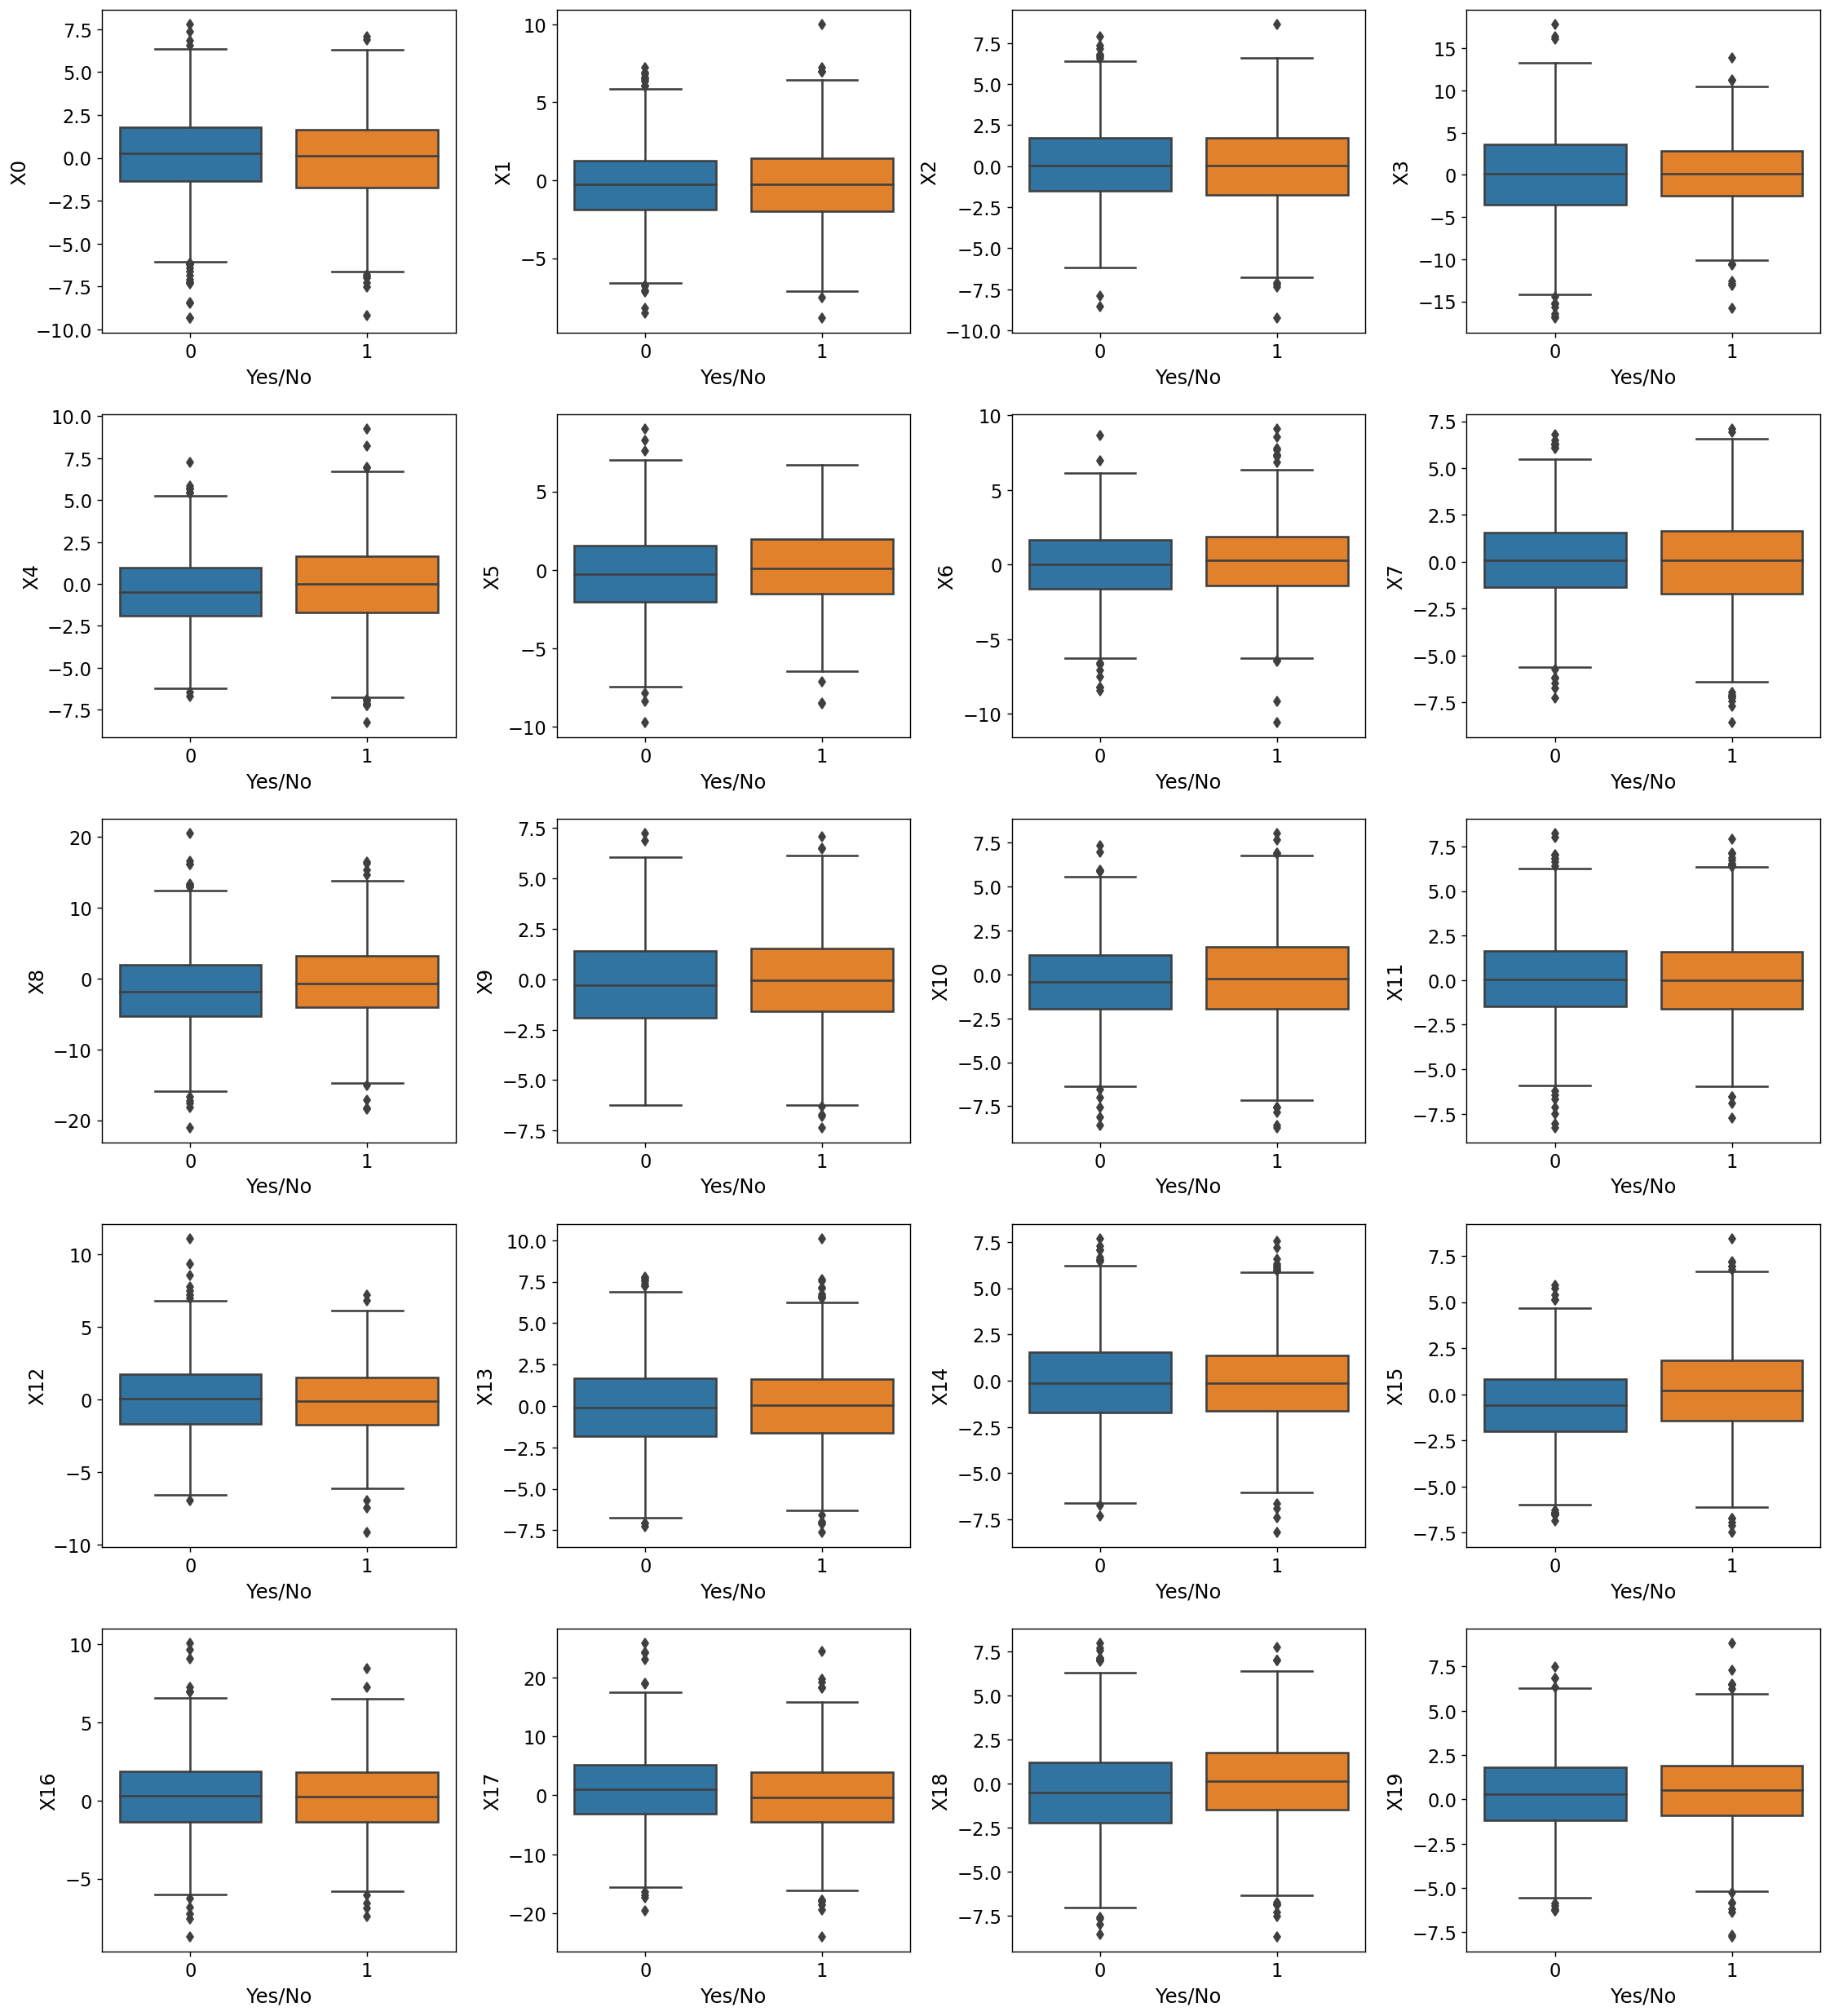

In [7]:
fig, ax = plt.subplots(5,4,figsize=(18,20),squeeze=False)
ax = ax.ravel()
for i in range(NUM_FEATURES):
    sns.boxplot(x='y', y=df.columns[i],data=df,ax=ax[i])
    ax[i].set_xlabel("Yes/No",fontsize=14)
    ax[i].set_ylabel('X'+str(i),fontsize=14)
plt.tight_layout(pad=1.5)
plt.show()

### List of classifier (Scikit-learn estimator objects with hyperparamemetr settings)

In [8]:
classifiers = [
    LogisticRegression(C=0.1,n_jobs=-1),
    KNeighborsClassifier(10,n_jobs=-1),
    SVC(kernel="linear", C=0.1),
    SVC(gamma='scale', C=1),
    DecisionTreeClassifier(max_depth=10,min_samples_leaf=10),
    RandomForestClassifier(max_depth=3, n_estimators=50, 
                           max_features=5,min_samples_leaf=10,n_jobs=-1),
    MLPClassifier(hidden_layer_sizes=(50,50),alpha=0.2,activation='relu', 
                  max_iter=200,learning_rate_init=0.01,learning_rate='adaptive',
                 early_stopping=True,validation_fraction=0.2),
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                       n_estimators=50,learning_rate=0.1),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                       n_estimators=50, max_features=5,n_jobs=-1),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(reg_param=0.1)]

In [9]:
names = ["Logistic Regression","Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Bagging",
         "Naive Bayes", "QDA"]

### Test/train set

In [10]:
TEST_FRAC = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=TEST_FRAC, 
                                                    random_state=7406)

In [11]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Running through the classifiers once

In [12]:
for name, clf in zip(names, classifiers):
    t1 = time.time()
    clf.fit(X_train, y_train)
    t2 = time.time()
    delta_t = round((t2-t1)*1000,3)
    score = round(clf.score(X_test, y_test),3)
    print(f"Fitting with {name} took {delta_t} ms.\n Score: {score}")
    print("-"*75)

Fitting with Logistic Regression took 1093.062 ms.
 Score: 0.57
---------------------------------------------------------------------------
Fitting with Nearest Neighbors took 0.0 ms.
 Score: 0.732
---------------------------------------------------------------------------
Fitting with Linear SVM took 97.842 ms.
 Score: 0.582
---------------------------------------------------------------------------
Fitting with RBF SVM took 91.431 ms.
 Score: 0.802
---------------------------------------------------------------------------
Fitting with Decision Tree took 28.571 ms.
 Score: 0.6
---------------------------------------------------------------------------
Fitting with Random Forest took 87.537 ms.
 Score: 0.618
---------------------------------------------------------------------------
Fitting with Neural Net took 467.386 ms.
 Score: 0.722
---------------------------------------------------------------------------
Fitting with AdaBoost took 469.498 ms.
 Score: 0.682
---------------------

### Function to run through classifiers repeatedly

In [13]:
def rename_duplicates( old ):
    seen = {}
    for x in old:
        if x in seen:
            seen[x] += 1
            yield "%s_%d" % (x, seen[x])
        else:
            seen[x] = 0
            yield x

In [14]:
def run_classifiers(X,y,
                    clf_lst = [LogisticRegression(C=0.1,n_jobs=-1)],
                    names=None,
                    num_runs=10,
                    test_frac=0.2,
                    scaling=True,
                    metric='accuracy',
                    runtime=True,
                    verbose=0):
    """
    Runs through the list of classifiers for a given number of times.
    Returns a DataFrame with scores (and, optionally, running times).
    """
    if names is None:
        names = [str(type(c)).split('.')[-1][:-2] for c in clf_lst]
        names = list(rename_duplicates(names))

    assert len(names)==len(clf_lst), print("Length of the classifier names and list of classifiers did not match.")
    
    scores = dict.fromkeys(names,[])
    if runtime:
        runtimes = dict.fromkeys(names,[])
    for name, clf in zip(names, clf_lst):
        if runtime:
            sc,rt= [],[]
        else:
            sc=[]
        for i in range(num_runs):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac,)
            if scaling:
                X_train = StandardScaler().fit_transform(X_train)
                X_test = StandardScaler().fit_transform(X_test)
            if runtime:
                t1 = time.time()
                clf.fit(X_train, y_train)
                t2 = time.time()
                delta_t = round((t2-t1)*1000,3)
                rt.append(delta_t)
            else:
                clf.fit(X_train, y_train)
            if metric=='accuracy':
                score = round(clf.score(X_test, y_test),3)
            if metric=='f1':
                score = f1_score(y_test,clf.predict(X_test))
            sc.append(score)
        
        # Book-keeping scores and runtime        
        sc = np.array(sc)
        scores[name] = sc
        if runtime:
            rt = np.array(rt)
            runtimes[name] = rt
        if verbose:
            print(f"Finished {num_runs} runs for {name} algorithm")
            print("-"*75)
    
    # Convert to DataFrame
    df_scores = pd.DataFrame(scores)
    if runtime:
        df_runtimes = pd.DataFrame(runtimes)
    
    if runtime:
        return df_scores,df_runtimes
    else:
        return df_scores

In [15]:
def plot_bars(d,
              t1="Mean accuracy score of algorithms",
              t2="Std.dev of the accuracy scores of algorithms"):
    """
    Plots bar charts of given dataframes of metrics
    """
    fig,ax=plt.subplots(1,2,figsize=(14,5))
    ax[0].barh(y=list(d.columns),width=d.describe().T['mean'],height=0.6,color='goldenrod')
    ax[0].set_title(t1)
    ax[1].barh(y=list(d.columns),width=d.describe().T['std'],height=0.6,color='dodgerblue')
    ax[1].set_title(t2)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['left'].set_visible(False)
    ax[0].spines['bottom'].set_color('#DDDDDD')
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].spines['bottom'].set_color('#DDDDDD')
    plt.tight_layout(pad=1.5)
    plt.show()

### Run through clasifiers and plot

In [16]:
d1 = run_classifiers(X,y,
                     clf_lst=classifiers,
                     metric='f1',
                     num_runs=5,
                     runtime=False,
                     verbose=1)

Finished 5 runs for LogisticRegression algorithm
---------------------------------------------------------------------------
Finished 5 runs for KNeighborsClassifier algorithm
---------------------------------------------------------------------------
Finished 5 runs for SVC algorithm
---------------------------------------------------------------------------
Finished 5 runs for SVC_1 algorithm
---------------------------------------------------------------------------
Finished 5 runs for DecisionTreeClassifier algorithm
---------------------------------------------------------------------------
Finished 5 runs for RandomForestClassifier algorithm
---------------------------------------------------------------------------
Finished 5 runs for MLPClassifier algorithm
---------------------------------------------------------------------------
Finished 5 runs for AdaBoostClassifier algorithm
---------------------------------------------------------------------------
Finished 5 runs for Bag

In [18]:
d1.T

0         1         2         3  \
LogisticRegression             0.585000  0.614634  0.600985  0.636132   
KNeighborsClassifier           0.751295  0.733154  0.747253  0.748052   
SVC                            0.579345  0.621212  0.583541  0.585752   
SVC_1                          0.816832  0.823834  0.789610  0.811594   
DecisionTreeClassifier         0.593176  0.627160  0.556150  0.668305   
RandomForestClassifier         0.648101  0.625954  0.602041  0.613811   
MLPClassifier                  0.734584  0.785542  0.785714  0.776699   
AdaBoostClassifier             0.647343  0.716346  0.655340  0.656934   
BaggingClassifier              0.653061  0.607595  0.649289  0.652174   
GaussianNB                     0.586735  0.646914  0.625917  0.643216   
QuadraticDiscriminantAnalysis  0.828283  0.814070  0.794595  0.819588   

                                      4  
LogisticRegression             0.587065  
KNeighborsClassifier           0.744304  
SVC                            0.604167  
SVC_1                          0.797927  
DecisionTreeClassifier         0.649077  
RandomForestClassifier         0.635870  
MLPClassifier                  0.757033  
AdaBoostClassifier             0.671835  
BaggingClassifier              0.632432  
GaussianNB                     0.621891  
QuadraticDiscriminantAnalysis  0.812500

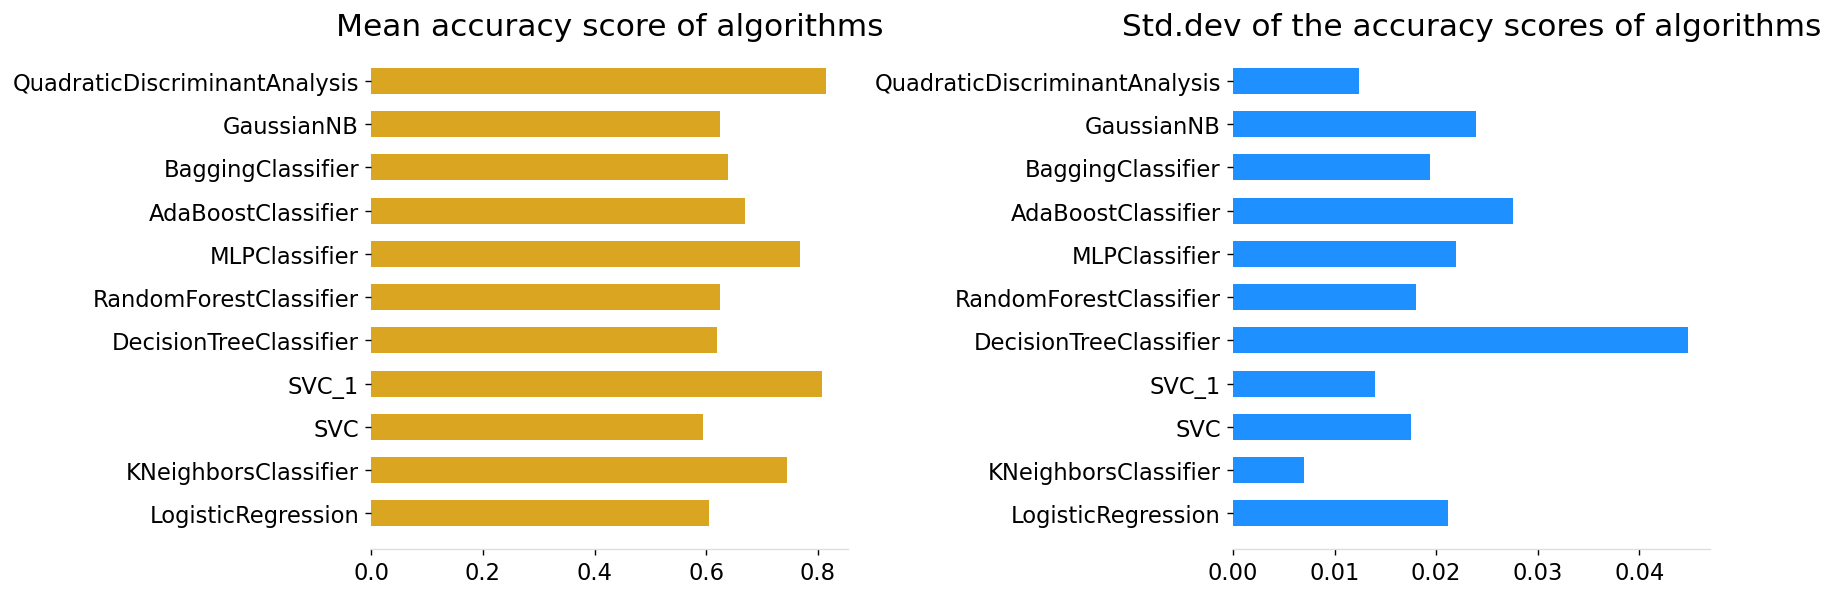

In [19]:
plot_bars(d1,
          t1="Mean accuracy score of algorithms",
          t2="Std.dev of the accuracy scores of algorithms")

In [59]:
clf_lst = [DecisionTreeClassifier(max_depth=i) for i in range(2,16)]

In [60]:
d1 = run_classifiers(X,y,clf_lst=clf_lst,
                     metric='f1',
                     num_runs=10,
                     runtime=False,
                     verbose=1)

Finished 10 runs for DecisionTreeClassifier algorithm
---------------------------------------------------------------------------
Finished 10 runs for DecisionTreeClassifier_1 algorithm
---------------------------------------------------------------------------
Finished 10 runs for DecisionTreeClassifier_2 algorithm
---------------------------------------------------------------------------
Finished 10 runs for DecisionTreeClassifier_3 algorithm
---------------------------------------------------------------------------
Finished 10 runs for DecisionTreeClassifier_4 algorithm
---------------------------------------------------------------------------
Finished 10 runs for DecisionTreeClassifier_5 algorithm
---------------------------------------------------------------------------
Finished 10 runs for DecisionTreeClassifier_6 algorithm
---------------------------------------------------------------------------
Finished 10 runs for DecisionTreeClassifier_7 algorithm
----------------------

In [61]:
d1

DecisionTreeClassifier  DecisionTreeClassifier_1  DecisionTreeClassifier_2  \
0                0.589595                  0.515152                  0.601036   
1                0.457338                  0.587952                  0.565350   
2                0.513433                  0.549133                  0.496732   
3                0.551724                  0.604534                  0.654628   
4                0.529070                  0.534392                  0.550964   
5                0.467456                  0.610577                  0.517350   
6                0.515759                  0.493750                  0.561856   
7                0.513274                  0.580110                  0.543417   
8                0.557377                  0.469136                  0.516129   
9                0.476471                  0.415335                  0.528000   

   DecisionTreeClassifier_3  DecisionTreeClassifier_4  \
0                  0.655582                  0.601036   
1                  0.657210                  0.616216   
2                  0.551351                  0.628866   
3                  0.644231                  0.542857   
4                  0.604520                  0.514620   
5                  0.538922                  0.601093   
6                  0.611940                  0.628713   
7                  0.619165                  0.590674   
8                  0.564972                  0.589421   
9                  0.634383                  0.639821   

   DecisionTreeClassifier_5  DecisionTreeClassifier_6  \
0                  0.582418                  0.492837   
1                  0.550562                  0.546961   
2                  0.603015                  0.613757   
3                  0.572890                  0.617564   
4                  0.596306                  0.630769   
5                  0.578378                  0.577031   
6                  0.621762                  0.575198   
7                  0.588235                  0.560440   
8                  0.649485                  0.600985   
9                  0.593824                  0.526596   

   DecisionTreeClassifier_7  DecisionTreeClassifier_8  \
0                  0.646766                  0.656331   
1                  0.543353                  0.623762   
2                  0.617021                  0.611940   
3                  0.624041                  0.641604   
4                  0.592040                  0.566929   
5                  0.639225                  0.580475   
6                  0.598901                  0.645000   
7                  0.656863                  0.562674   
8                  0.592391                  0.582418   
9                  0.643216                  0.584022   

   DecisionTreeClassifier_9  DecisionTreeClassifier_10  \
0                  0.566667                   0.564644   
1                  0.611825                   0.567568   
2                  0.618090                   0.651741   
3                  0.591623                   0.619289   
4                  0.642512                   0.569270   
5                  0.608899                   0.618454   
6                  0.623116                   0.624339   
7                  0.552632                   0.608479   
8                  0.616622                   0.612658   
9                  0.620690                   0.660147   

   DecisionTreeClassifier_11  DecisionTreeClassifier_12  \
0                   0.613466                   0.621554   
1                   0.595000                   0.628993   
2                   0.603491                   0.582677   
3                   0.635097                   0.606965   
4                   0.573566                   0.571429   
5                   0.609626                   0.621359   
6                   0.644836                   0.593350   
7                   0.648515                   0.619048   
8                   0.619289                   0.617722  

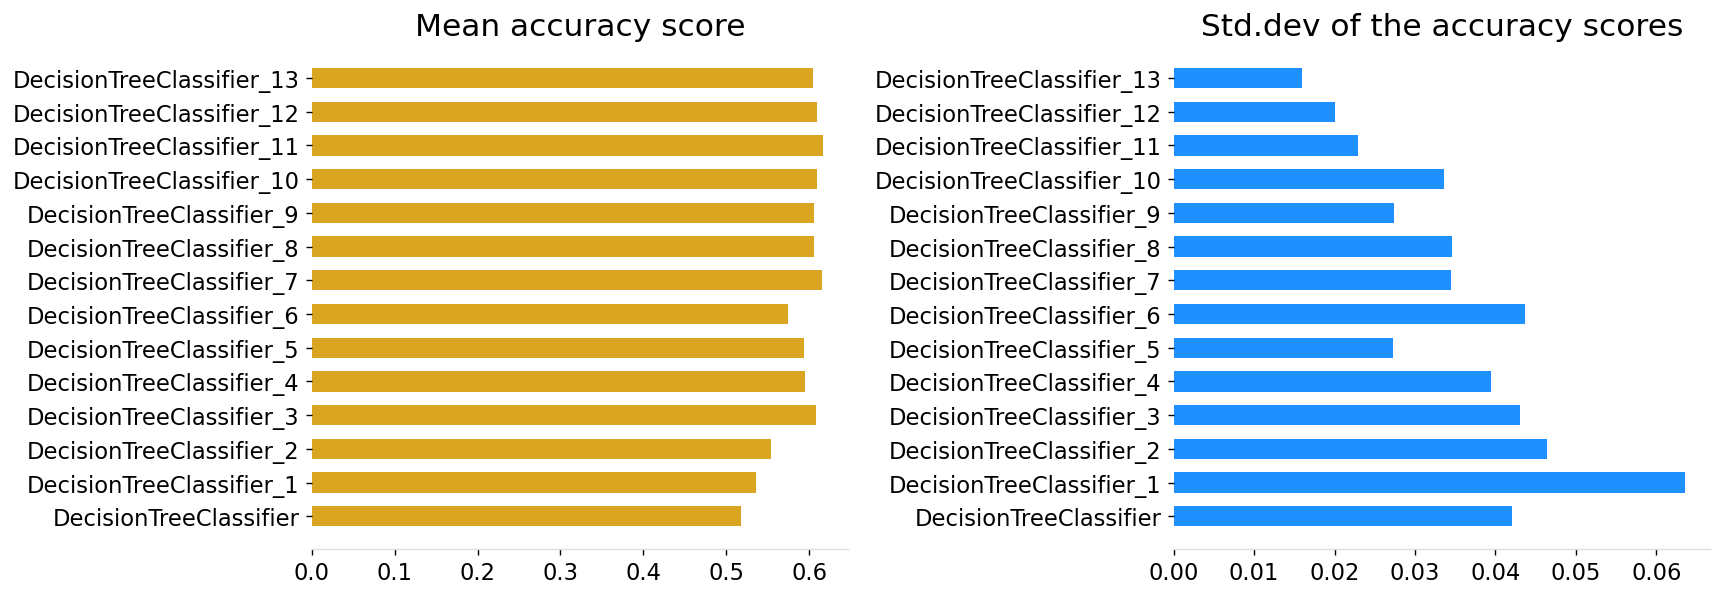

In [62]:
plot_bars(d1,
          t1="Mean accuracy score",
          t2="Std.dev of the accuracy scores")

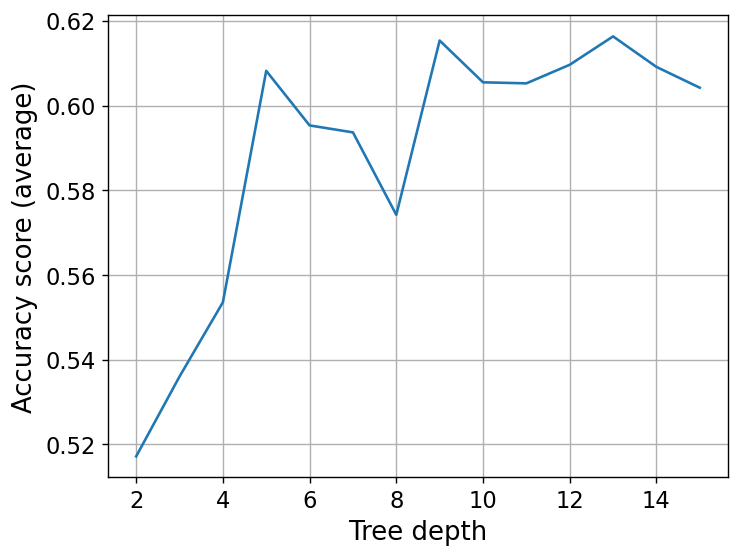

In [66]:
plt.plot([i for i in range(2,16)],d1.mean().values)
plt.xlabel("Tree depth",fontsize=15)
plt.ylabel("Accuracy score (average)",fontsize=15)
plt.grid(True)
plt.show()